In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
test = pd.read_csv('/kaggle/input/cmi-detect-behavior-with-sensor-data/test.csv')
train = pd.read_csv('/kaggle/input/cmi-detect-behavior-with-sensor-data/train.csv')
cols = [col for col in test.columns if col.startswith('tof_') or col.startswith('thm_')]

# Satır bazında eksik ya da -1 olan sütun var mı kontrolü
missing_mask = (test[cols].isna()) | (test[cols] == -1)

# Satırda en az bir eksik veya -1 varsa True olur
rows_with_missing = missing_mask.any(axis=1)

# Eksik veri olan satır sayısı
num_rows_with_missing = rows_with_missing.sum()

print(f"Toplam satır sayısı: {test.shape[0]}")
print(f"En az bir eksik (NaN veya -1) değeri içeren satır sayısı: {num_rows_with_missing}")
print(f"Oran: {num_rows_with_missing / test.shape[0]:.2%}")

Toplam satır sayısı: 107
En az bir eksik (NaN veya -1) değeri içeren satır sayısı: 107
Oran: 100.00%


In [6]:
test.head()

,row_id,sequence_id,sequence_counter,subject,acc_x,acc_y,acc_z,rot_w,rot_x,rot_y,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000001_000000,SEQ_000001,0,SUBJ_055840,9.039062,5.261719,0.800781,0.367188,-0.397400,-0.629028,...,97.0,87.0,206.0,-1.0,195.0,-1.0,-1.0,-1.0,111.0,-1.0
1,SEQ_000001_000001,SEQ_000001,1,SUBJ_055840,9.421875,3.460938,-1.113281,0.353882,-0.507141,-0.652710,...,175.0,158.0,-1.0,-1.0,-1.0,-1.0,-1.0,211.0,187.0,178.0
2,SEQ_000001_000002,SEQ_000001,2,SUBJ_055840,10.160156,2.082031,-3.871094,0.384094,-0.532104,-0.639648,...,-1.0,160.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,197.0,177.0
3,SEQ_000001_000003,SEQ_000001,3,SUBJ_055840,9.773438,1.355469,-4.371094,0.387756,-0.531982,-0.634033,...,-1.0,160.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,197.0,183.0
4,SEQ_000001_000004,SEQ_000001,4,SUBJ_055840,9.195312,1.011719,-3.222656,0.382751,-0.534180,-0.638367,...,-1.0,163.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,200.0,173.0


In [7]:
train.head()


,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [14]:
imu_cols = [col for col in test.columns if col.startswith('acc') or col.startswith('rot')]
thm_cols = [col for col in test.columns if col.startswith('thm')]
tof_cols = [col for col in test.columns if col.startswith('tof')]


train[tof_cols]

,tof_1_v0,tof_1_v1,tof_1_v2,tof_1_v3,tof_1_v4,tof_1_v5,tof_1_v6,tof_1_v7,tof_1_v8,tof_1_v9,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,131.0,134.0,132.0,135.0,98.0,74.0,64.0,60.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,130.0,138.0,131.0,135.0,101.0,76.0,66.0,61.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,137.0,136.0,147.0,109.0,90.0,81.0,74.0,74.0,-1.0,164.0,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,143.0,147.0,170.0,127.0,109.0,98.0,95.0,95.0,-1.0,177.0,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,178.0,191.0,183.0,157.0,146.0,139.0,143.0,148.0,-1.0,-1.0,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574940,35.0,41.0,48.0,54.0,59.0,61.0,-1.0,-1.0,37.0,48.0,...,62.0,65.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,71.0
574941,44.0,39.0,52.0,55.0,58.0,67.0,-1.0,-1.0,44.0,46.0,...,71.0,72.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
574942,46.0,36.0,40.0,46.0,52.0,53.0,62.0,-1.0,44.0,40.0,...,80.0,77.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
574943,47.0,37.0,46.0,49.0,54.0,51.0,63.0,-1.0,48.0,41.0,...,72.0,77.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [6]:
# SEQ LEN
sequence_lengths = train['sequence_id'].value_counts()
length_description = sequence_lengths.describe()
length_description

count    8151.000000
mean       70.536744
std        35.389879
min        29.000000
25%        51.000000
50%        59.000000
75%        78.000000
max       700.000000
Name: count, dtype: float64

In [7]:
train['subject'].unique()

array(['SUBJ_059520', 'SUBJ_020948', 'SUBJ_040282', 'SUBJ_052342',
       'SUBJ_032165', 'SUBJ_024086', 'SUBJ_040733', 'SUBJ_063346',
       'SUBJ_055211', 'SUBJ_001430', 'SUBJ_012088', 'SUBJ_040310',
       'SUBJ_032233', 'SUBJ_059330', 'SUBJ_013623', 'SUBJ_032585',
       'SUBJ_063464', 'SUBJ_038023', 'SUBJ_044680', 'SUBJ_024137',
       'SUBJ_030676', 'SUBJ_047636', 'SUBJ_053173', 'SUBJ_057917',
       'SUBJ_040724', 'SUBJ_049223', 'SUBJ_019262', 'SUBJ_053906',
       'SUBJ_027682', 'SUBJ_058786', 'SUBJ_000206', 'SUBJ_032761',
       'SUBJ_017170', 'SUBJ_041243', 'SUBJ_019663', 'SUBJ_061552',
       'SUBJ_032704', 'SUBJ_011323', 'SUBJ_041770', 'SUBJ_040106',
       'SUBJ_039234', 'SUBJ_050642', 'SUBJ_021670', 'SUBJ_056936',
       'SUBJ_042779', 'SUBJ_034574', 'SUBJ_008304', 'SUBJ_064387',
       'SUBJ_054811', 'SUBJ_045235', 'SUBJ_017807', 'SUBJ_034631',
       'SUBJ_024825', 'SUBJ_019297', 'SUBJ_035353', 'SUBJ_027671',
       'SUBJ_004117', 'SUBJ_042794', 'SUBJ_008728', 'SUBJ_0033

In [18]:
train['gesture'].unique()
train


,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574940,SEQ_065531_000048,Non-Target,SEQ_065531,48,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.503906,...,62.0,65.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,71.0
574941,SEQ_065531_000049,Non-Target,SEQ_065531,49,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.773438,...,71.0,72.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
574942,SEQ_065531_000050,Non-Target,SEQ_065531,50,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.082031,...,80.0,77.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
574943,SEQ_065531_000051,Non-Target,SEQ_065531,51,SUBJ_039498,Seated Lean Non Dom - FACE DOWN,Performs gesture,Gesture,Write name on leg,3.964844,...,72.0,77.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


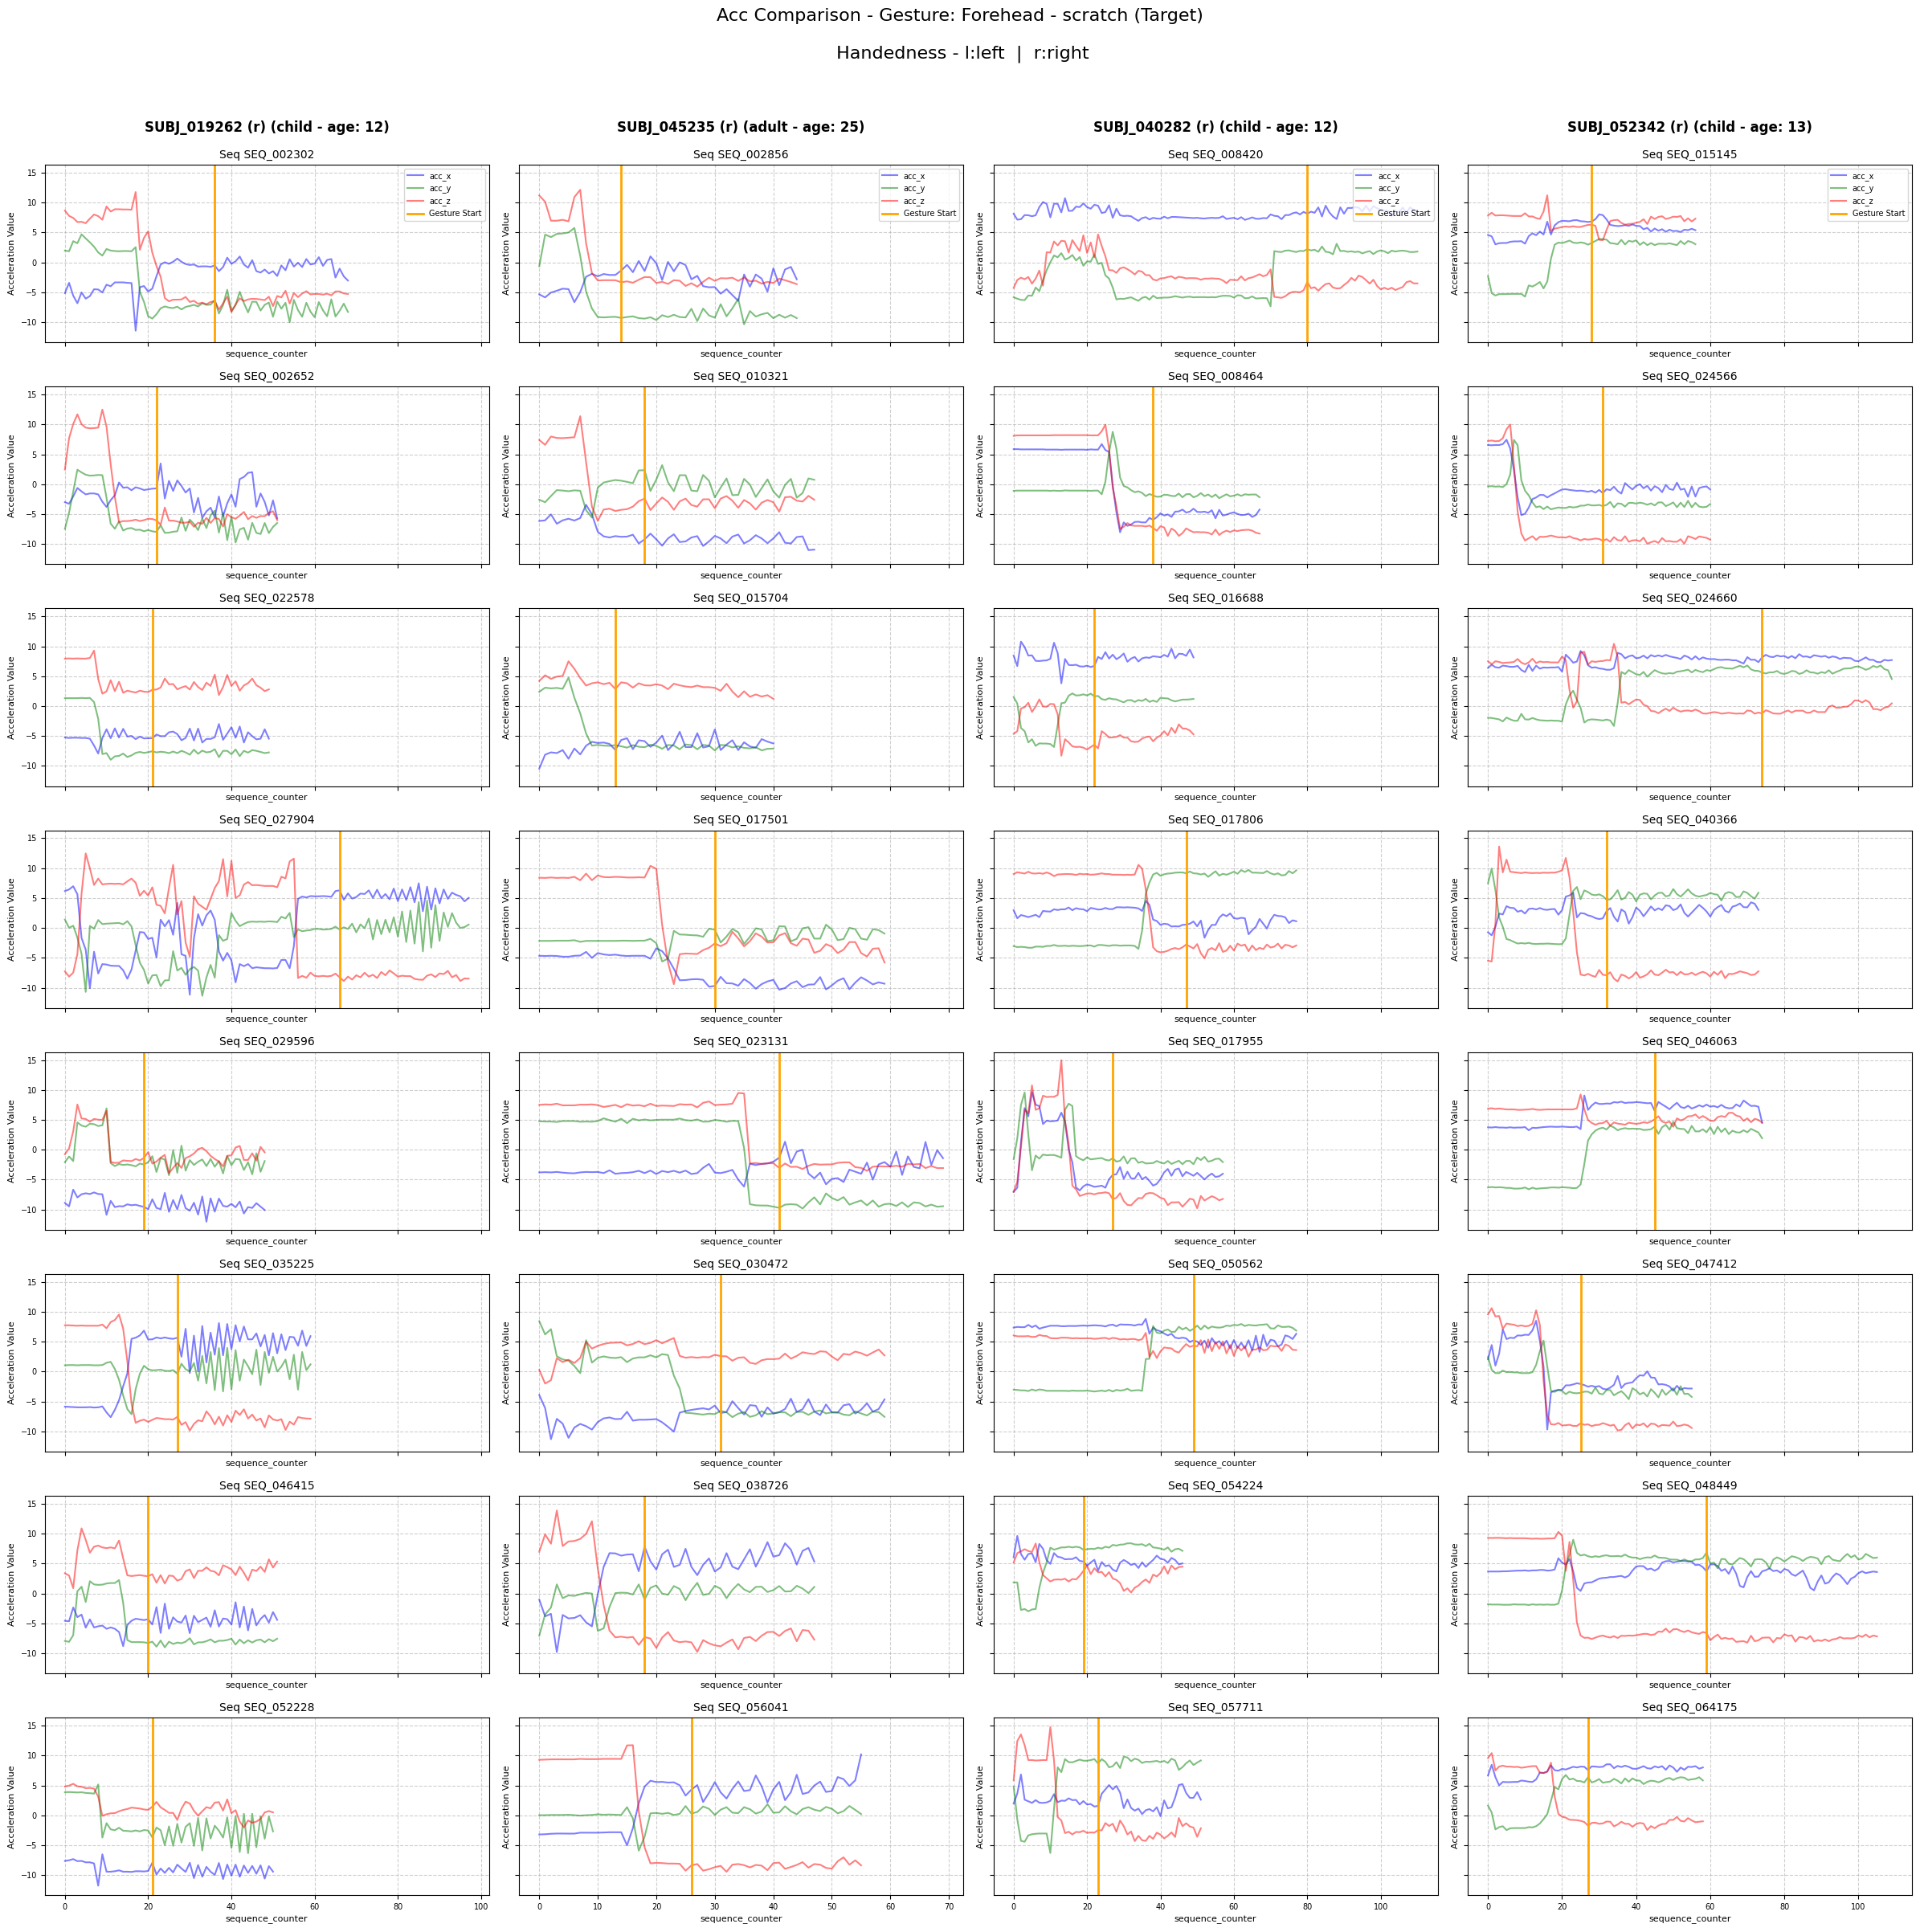

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_sensor_data_for_subject_gesture_side_by_side(df, subject_list, target_gesture, time_column='sequence_counter', acc_x_col='acc_x', acc_y_col='acc_y', acc_z_col='acc_z'):
    required_columns = ['subject', 'gesture', 'sequence_id', 'phase', time_column, acc_x_col, acc_y_col, acc_z_col]
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"DataFrame must contain all required columns: {required_columns}")

    max_sequences = 0
    for sub in subject_list:
        filtered_sub_df = df[(df['subject'] == sub) & (df['gesture'] == target_gesture)].copy()
        if not filtered_sub_df.empty:
            max_sequences = max(max_sequences, len(filtered_sub_df['sequence_id'].unique()))
    
    if max_sequences == 0:
        print(f"No data found for the specified subjects ({subject_list}) and gesture ('{target_gesture}').")
        return

    fig, axes = plt.subplots(
        nrows=max_sequences,
        ncols=len(subject_list),
        figsize=(6 * len(subject_list) * 2 if len(subject_list) == 1 else 6 * len(subject_list), 3 * max_sequences),
        sharex='col', sharey=True
    )
    
    if len(subject_list) == 1 and max_sequences == 1:
        axes = np.array([[axes]])
    elif len(subject_list) == 1:
        axes = axes[:, np.newaxis]
    elif max_sequences == 1:
        axes = axes[np.newaxis, :]

    for col_idx, target_subject in enumerate(subject_list):
        filtered_df = df[(df['subject'] == target_subject) & (df['gesture'] == target_gesture)].copy()
        unique_seq_ids = filtered_df['sequence_id'].unique()
        unique_seq_ids.sort()

        if filtered_df.empty:
            print(f"No data found for Subject '{target_subject}' with Gesture '{target_gesture}'.")
            for row_idx in range(max_sequences):
                axes[row_idx, col_idx].set_visible(False)
            continue

        for row_idx, seq_id in enumerate(unique_seq_ids):
            if row_idx >= max_sequences:
                break
            
            seq_df = filtered_df[filtered_df['sequence_id'] == seq_id].sort_values(by=time_column)

            ax = axes[row_idx, col_idx]
            
            ax.plot(seq_df[time_column], seq_df[acc_x_col], color='blue', alpha=0.5, label='acc_x')
            ax.plot(seq_df[time_column], seq_df[acc_y_col], color='green', alpha=0.5, label='acc_y')
            ax.plot(seq_df[time_column], seq_df[acc_z_col], color='red', alpha=0.5, label='acc_z')
            
            # Phase geçişlerini işaretle
            transition_start_idx = seq_df[seq_df['phase'] == 'Transition'][time_column].min()
            gesture_start_idx = seq_df[seq_df['phase'] == 'Gesture'][time_column].min()

            if not pd.isna(gesture_start_idx):
                ax.axvline(gesture_start_idx, color='orange', linestyle='-', linewidth=2, label='Gesture Start')
            
            ax.set_title(f'Seq {seq_id}', fontsize=10)
            ax.set_xlabel(f'{time_column}', fontsize=8)
            ax.set_ylabel('Acceleration Value', fontsize=8)
            ax.grid(True, linestyle='--', alpha=0.6)
            ax.tick_params(axis='both', which='major', labelsize=7)
            
            if row_idx == 0:
                ax.legend(fontsize=7, loc='upper right')

            if row_idx == 0:
                ax.text(0.5, 1.25, f"{target_subject} ({'l' if seq_df['handedness'].iloc[0] == 0 else 'r'}) ({'child' if seq_df['adult_child'].iloc[0] == 0 else 'adult'} - age: {seq_df['age'].iloc[0]})", transform=ax.transAxes,
                        fontsize=12, fontweight='bold', ha='center', va='top')
        
        for empty_row_idx in range(len(unique_seq_ids), max_sequences):
            axes[empty_row_idx, col_idx].set_visible(False)

    plt.suptitle(f"Acc Comparison - Gesture: {target_gesture} ({(seq_df['sequence_type'].iloc[0])})\n\n Handedness - l:left  |  r:right", fontsize=16, y=1.0)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

subject_list = ['SUBJ_019262',  'SUBJ_045235', 'SUBJ_040282', 'SUBJ_052342']
"""subject_list = ['SUBJ_059520', 'SUBJ_020948', 'SUBJ_040282', 'SUBJ_052342',
       'SUBJ_032165', 'SUBJ_024086', 'SUBJ_040733', 'SUBJ_063346',
       'SUBJ_055211', 'SUBJ_001430', 'SUBJ_012088', 'SUBJ_040310',
       'SUBJ_032233', 'SUBJ_059330', 'SUBJ_013623', 'SUBJ_032585',
       'SUBJ_063464', 'SUBJ_038023', 'SUBJ_044680', 'SUBJ_024137',
       'SUBJ_030676', 'SUBJ_047636', 'SUBJ_053173', 'SUBJ_057917',
       'SUBJ_040724', 'SUBJ_049223', 'SUBJ_019262', 'SUBJ_053906',
       'SUBJ_027682', 'SUBJ_058786', 'SUBJ_000206', 'SUBJ_032761',
       'SUBJ_017170', 'SUBJ_041243', 'SUBJ_019663', 'SUBJ_061552',
       'SUBJ_032704', 'SUBJ_011323', 'SUBJ_041770', 'SUBJ_040106',
       'SUBJ_039234', 'SUBJ_050642', 'SUBJ_021670', 'SUBJ_056936',
       'SUBJ_042779', 'SUBJ_034574', 'SUBJ_008304', 'SUBJ_064387',
       'SUBJ_054811', 'SUBJ_045235', 'SUBJ_017807', 'SUBJ_034631',
       'SUBJ_024825', 'SUBJ_019297', 'SUBJ_035353', 'SUBJ_027671',
       'SUBJ_004117', 'SUBJ_042794', 'SUBJ_008728', 'SUBJ_003328',
       'SUBJ_017499', 'SUBJ_036450', 'SUBJ_019756', 'SUBJ_026824',
       'SUBJ_063447', 'SUBJ_063319', 'SUBJ_051942', 'SUBJ_028998',
       'SUBJ_058967', 'SUBJ_038277', 'SUBJ_059960', 'SUBJ_002923',
       'SUBJ_026460', 'SUBJ_039498', 'SUBJ_053217', 'SUBJ_043192',
       'SUBJ_042254', 'SUBJ_016552', 'SUBJ_036405', 'SUBJ_038709',
       'SUBJ_023739']"""
# plot_sensor_data_for_subject_gesture_side_by_side(train, subject_list, 'Write name on leg')
for i in range(0, len(subject_list), 4):
    chunk = subject_list[i:i+4]
    plot_sensor_data_for_subject_gesture_side_by_side(train, chunk, 'Forehead - scratch')

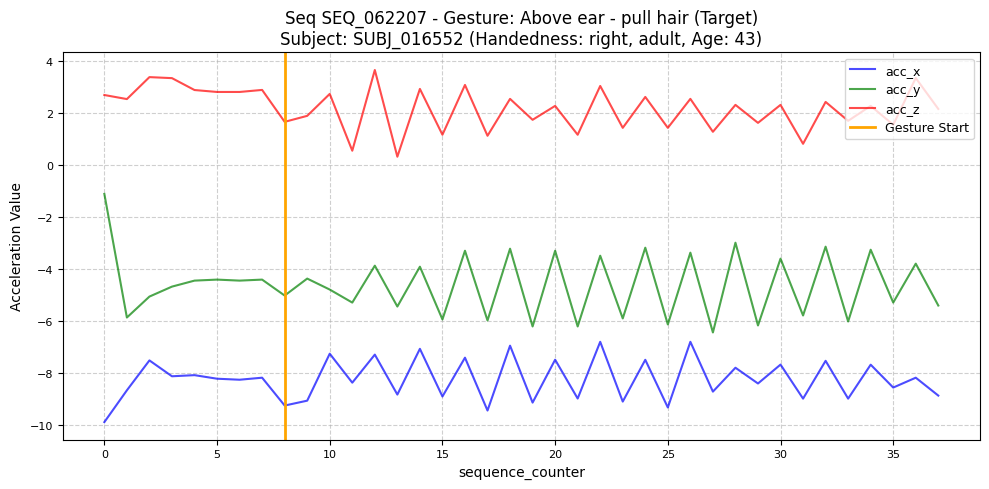

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_single_sequence_sensor_data(df, target_sequence_id,
                                    time_column='sequence_counter',
                                    acc_x_col='acc_x', acc_y_col='acc_y', acc_z_col='acc_z'):
    required_columns = ['subject', 'gesture', 'sequence_id', 'phase', time_column, acc_x_col, acc_y_col, acc_z_col, 'handedness', 'adult_child', 'age', 'sequence_type']
    if not all(col in df.columns for col in required_columns):
        print(f"Uyarı: DataFrame eksik sütunlar içeriyor. Eksik olanlar: {[col for col in required_columns if col not in df.columns]}")
        raise ValueError(f"DataFrame must contain all required columns: {required_columns}")

    seq_df = df[df['sequence_id'] == target_sequence_id].copy()

    if seq_df.empty:
        print(f"Hata: sequence_id '{target_sequence_id}' bulunamadı.")
        return

    seq_df = seq_df.sort_values(by=time_column)

    subject_info = seq_df.iloc[0]
    subject_id = subject_info['subject']
    gesture_name = subject_info['gesture']
    handedness = 'left' if subject_info['handedness'] == 0 else 'right'
    adult_child = 'child' if subject_info['adult_child'] == 0 else 'adult'
    age = subject_info['age']
    sequence_type = subject_info['sequence_type']

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(seq_df[time_column], seq_df[acc_x_col], color='blue', alpha=0.7, label='acc_x')
    ax.plot(seq_df[time_column], seq_df[acc_y_col], color='green', alpha=0.7, label='acc_y')
    ax.plot(seq_df[time_column], seq_df[acc_z_col], color='red', alpha=0.7, label='acc_z')

    gesture_start_idx = seq_df[seq_df['phase'] == 'Gesture'][time_column].min()
    if not pd.isna(gesture_start_idx):
        ax.axvline(gesture_start_idx, color='orange', linestyle='-', linewidth=2, label='Gesture Start')

    ax.set_title(f"Seq {target_sequence_id} - Gesture: {gesture_name} ({sequence_type})\n"
                 f"Subject: {subject_id} (Handedness: {handedness}, {adult_child}, Age: {age})",
                 fontsize=12)
    ax.set_xlabel(f'{time_column}', fontsize=10)
    ax.set_ylabel('Acceleration Value', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(fontsize=9, loc='upper right')
    ax.tick_params(axis='both', which='major', labelsize=8)

    plt.tight_layout()
    plt.show()

plot_single_sequence_sensor_data(train,'SEQ_062207')

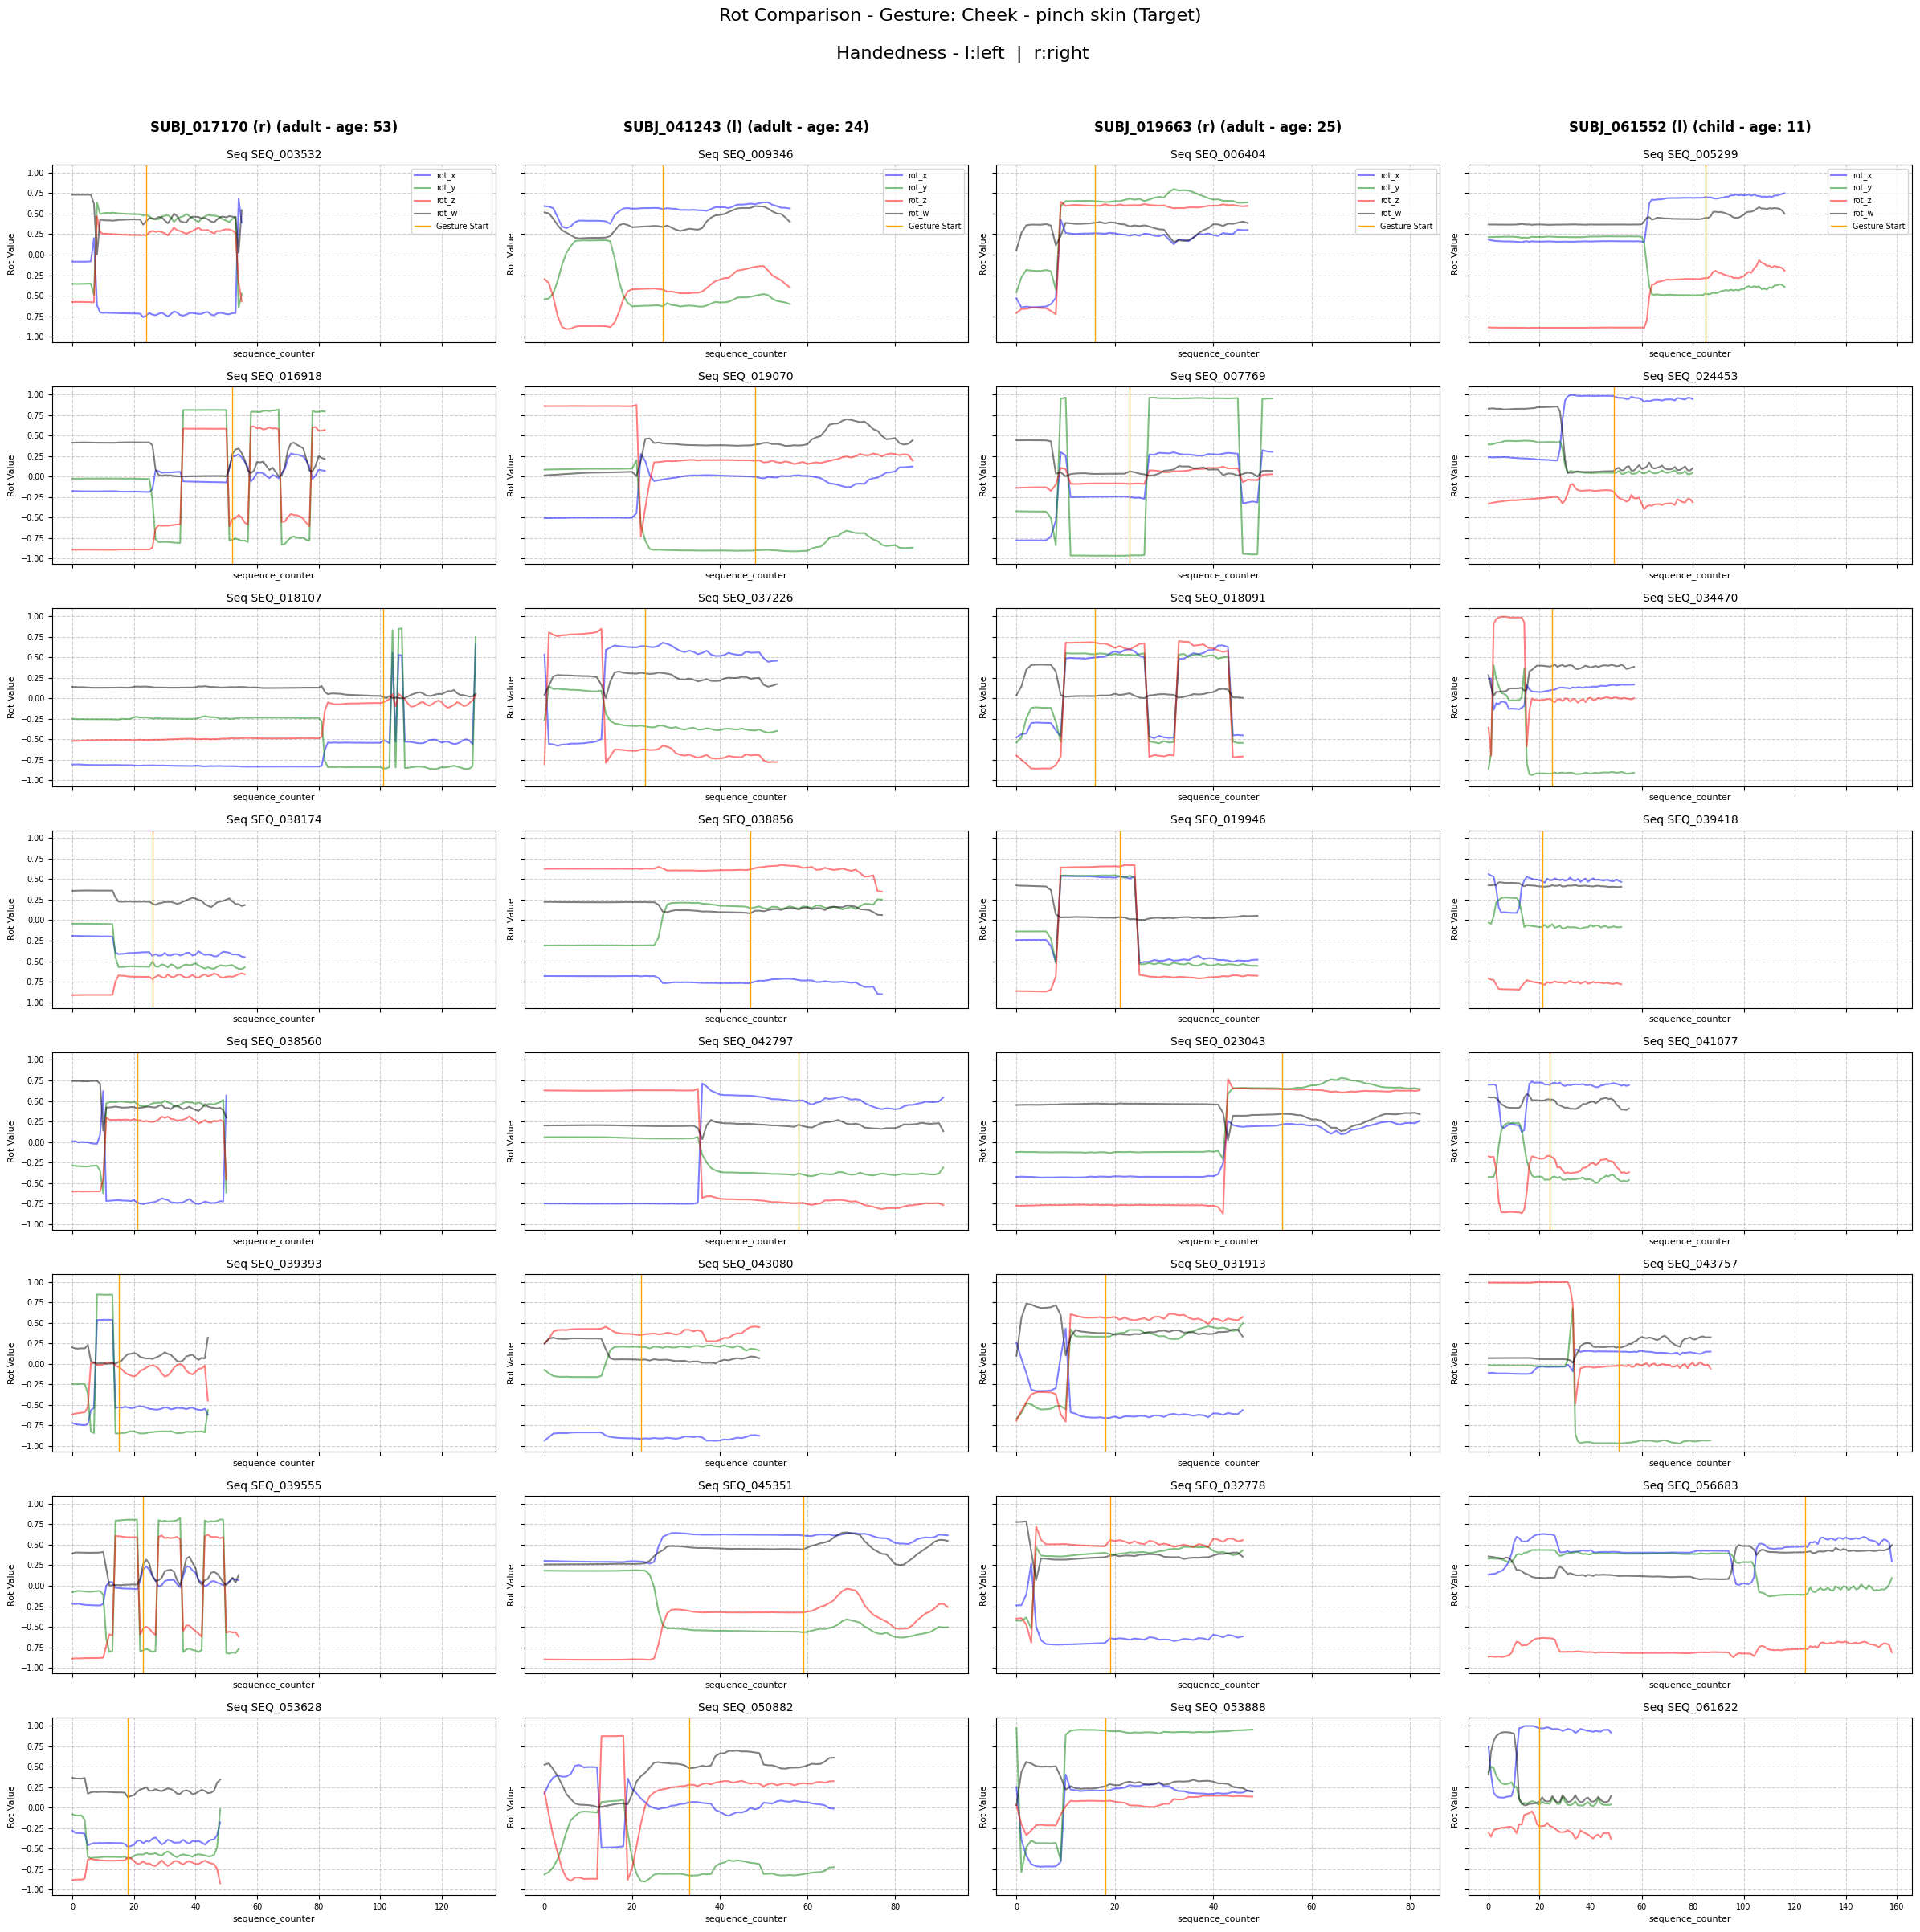

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_sensor_data_for_subject_gesture_side_by_side(df, subject_list, target_gesture, time_column='sequence_counter', rot_x_col='rot_x', rot_y_col='rot_y', rot_z_col='rot_z', rot_w_col='rot_w'):
    required_columns = ['subject', 'gesture', 'sequence_id', 'phase', time_column, rot_x_col, rot_y_col, rot_z_col, rot_w_col]
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"DataFrame must contain all required columns: {required_columns}")

    max_sequences = 0
    for sub in subject_list:
        filtered_sub_df = df[(df['subject'] == sub) & (df['gesture'] == target_gesture)].copy()
        if not filtered_sub_df.empty:
            max_sequences = max(max_sequences, len(filtered_sub_df['sequence_id'].unique()))
    
    if max_sequences == 0:
        print(f"No data found for the specified subjects ({subject_list}) and gesture ('{target_gesture}').")
        return

    fig, axes = plt.subplots(
        nrows=max_sequences,
        ncols=len(subject_list),
        figsize=(6 * len(subject_list) * 2 if len(subject_list) == 1 else 6 * len(subject_list), 3 * max_sequences),
        sharex='col', sharey=True
    )
    
    if len(subject_list) == 1 and max_sequences == 1:
        axes = np.array([[axes]])
    elif len(subject_list) == 1:
        axes = axes[:, np.newaxis]
    elif max_sequences == 1:
        axes = axes[np.newaxis, :]

    for col_idx, target_subject in enumerate(subject_list):
        filtered_df = df[(df['subject'] == target_subject) & (df['gesture'] == target_gesture)].copy()
        unique_seq_ids = filtered_df['sequence_id'].unique()
        unique_seq_ids.sort()

        if filtered_df.empty:
            print(f"No data found for Subject '{target_subject}' with Gesture '{target_gesture}'.")
            for row_idx in range(max_sequences):
                axes[row_idx, col_idx].set_visible(False)
            continue

        for row_idx, seq_id in enumerate(unique_seq_ids):
            if row_idx >= max_sequences:
                break
            
            seq_df = filtered_df[filtered_df['sequence_id'] == seq_id].sort_values(by=time_column)

            ax = axes[row_idx, col_idx]
            
            ax.plot(seq_df[time_column], seq_df[rot_x_col], color='blue', alpha=0.5, label='rot_x')
            ax.plot(seq_df[time_column], seq_df[rot_y_col], color='green', alpha=0.5, label='rot_y')
            ax.plot(seq_df[time_column], seq_df[rot_z_col], color='red', alpha=0.5, label='rot_z')
            ax.plot(seq_df[time_column], seq_df[rot_w_col], color='black', alpha=0.5, label='rot_w')
            
            
            # Phase geçişlerini işaretle
            transition_start_idx = seq_df[seq_df['phase'] == 'Transition'][time_column].min()
            gesture_start_idx = seq_df[seq_df['phase'] == 'Gesture'][time_column].min()

            if not pd.isna(gesture_start_idx):
                ax.axvline(gesture_start_idx, color='orange', linestyle='-', linewidth=1, label='Gesture Start')
            
            ax.set_title(f'Seq {seq_id}', fontsize=10)
            ax.set_xlabel(f'{time_column}', fontsize=8)
            ax.set_ylabel('Rot Value', fontsize=8)
            ax.grid(True, linestyle='--', alpha=0.6)
            ax.tick_params(axis='both', which='major', labelsize=7)
            
            if row_idx == 0:
                ax.legend(fontsize=7, loc='upper right')

            if row_idx == 0:
                ax.text(0.5, 1.25, f"{target_subject} ({'l' if seq_df['handedness'].iloc[0] == 0 else 'r'}) ({'child' if seq_df['adult_child'].iloc[0] == 0 else 'adult'} - age: {seq_df['age'].iloc[0]})", transform=ax.transAxes,
                        fontsize=12, fontweight='bold', ha='center', va='top')
        
        for empty_row_idx in range(len(unique_seq_ids), max_sequences):
            axes[empty_row_idx, col_idx].set_visible(False)

    plt.suptitle(f"Rot Comparison - Gesture: {target_gesture} ({(seq_df['sequence_type'].iloc[0])})\n\n Handedness - l:left  |  r:right", fontsize=16, y=1.0)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

subject_list = ['SUBJ_017170', 'SUBJ_041243', 'SUBJ_019663', 'SUBJ_061552']
plot_sensor_data_for_subject_gesture_side_by_side(train, subject_list, 'Cheek - pinch skin')

In [12]:
train['subject'].unique()

array(['SUBJ_059520', 'SUBJ_020948', 'SUBJ_040282', 'SUBJ_052342',
       'SUBJ_032165', 'SUBJ_024086', 'SUBJ_040733', 'SUBJ_063346',
       'SUBJ_055211', 'SUBJ_001430', 'SUBJ_012088', 'SUBJ_040310',
       'SUBJ_032233', 'SUBJ_059330', 'SUBJ_013623', 'SUBJ_032585',
       'SUBJ_063464', 'SUBJ_038023', 'SUBJ_044680', 'SUBJ_024137',
       'SUBJ_030676', 'SUBJ_047636', 'SUBJ_053173', 'SUBJ_057917',
       'SUBJ_040724', 'SUBJ_049223', 'SUBJ_019262', 'SUBJ_053906',
       'SUBJ_027682', 'SUBJ_058786', 'SUBJ_000206', 'SUBJ_032761',
       'SUBJ_017170', 'SUBJ_041243', 'SUBJ_019663', 'SUBJ_061552',
       'SUBJ_032704', 'SUBJ_011323', 'SUBJ_041770', 'SUBJ_040106',
       'SUBJ_039234', 'SUBJ_050642', 'SUBJ_021670', 'SUBJ_056936',
       'SUBJ_042779', 'SUBJ_034574', 'SUBJ_008304', 'SUBJ_064387',
       'SUBJ_054811', 'SUBJ_045235', 'SUBJ_017807', 'SUBJ_034631',
       'SUBJ_024825', 'SUBJ_019297', 'SUBJ_035353', 'SUBJ_027671',
       'SUBJ_004117', 'SUBJ_042794', 'SUBJ_008728', 'SUBJ_0033

Hareket (Gesture) Dağılımı:
gesture
Text on phone                                 58462
Neck - scratch                                56619
Eyebrow - pull hair                           44305
Forehead - scratch                            40923
Forehead - pull hairline                      40802
Above ear - pull hair                         40560
Neck - pinch skin                             40507
Eyelash - pull hair                           40218
Cheek - pinch skin                            40124
Wave hello                                    34356
Write name in air                             31267
Pull air toward your face                     30743
Feel around in tray and pull out an object    17114
Glasses on/off                                13542
Drink from bottle/cup                         13093
Scratch knee/leg skin                         12328
Write name on leg                             10138
Pinch knee/leg skin                            9844
Name: count, dtype: int64


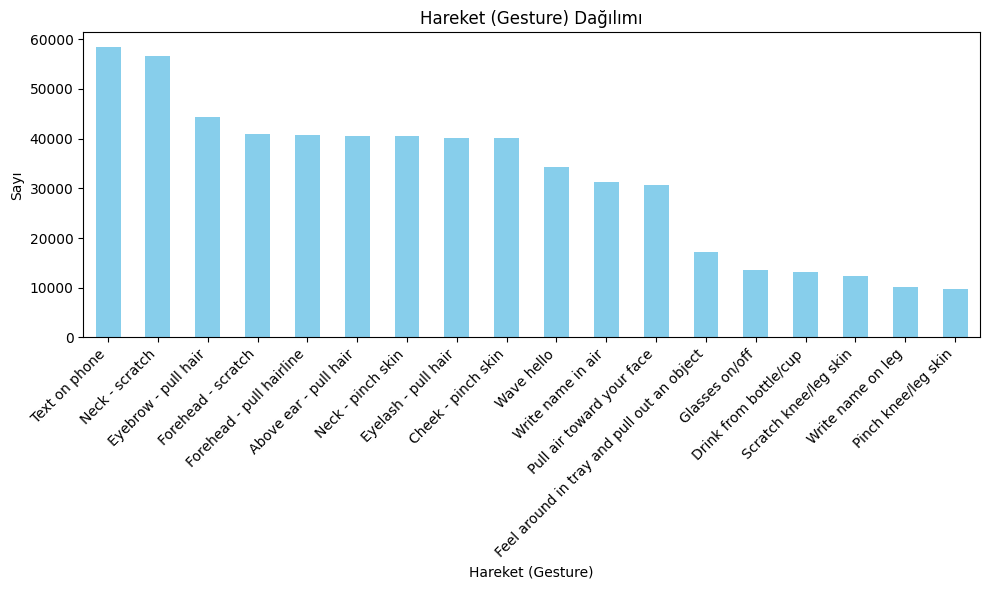

In [13]:
gesture_counts = train['gesture'].value_counts()
print("Hareket (Gesture) Dağılımı:")
print(gesture_counts)

plt.figure(figsize=(10, 6))
gesture_counts.plot(kind='bar', color='skyblue')
plt.title('Hareket (Gesture) Dağılımı')
plt.xlabel('Hareket (Gesture)')
plt.ylabel('Sayı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Her bir Hareketin (Gesture) Toplam Tekrar Sayısı:
gesture
Forehead - scratch                            640
Text on phone                                 640
Forehead - pull hairline                      640
Neck - scratch                                640
Neck - pinch skin                             640
Eyelash - pull hair                           640
Above ear - pull hair                         638
Eyebrow - pull hair                           638
Cheek - pinch skin                            637
Wave hello                                    478
Write name in air                             477
Pull air toward your face                     477
Feel around in tray and pull out an object    161
Write name on leg                             161
Pinch knee/leg skin                           161
Scratch knee/leg skin                         161
Drink from bottle/cup                         161
Glasses on/off                                161
Name: count, dtype: int64


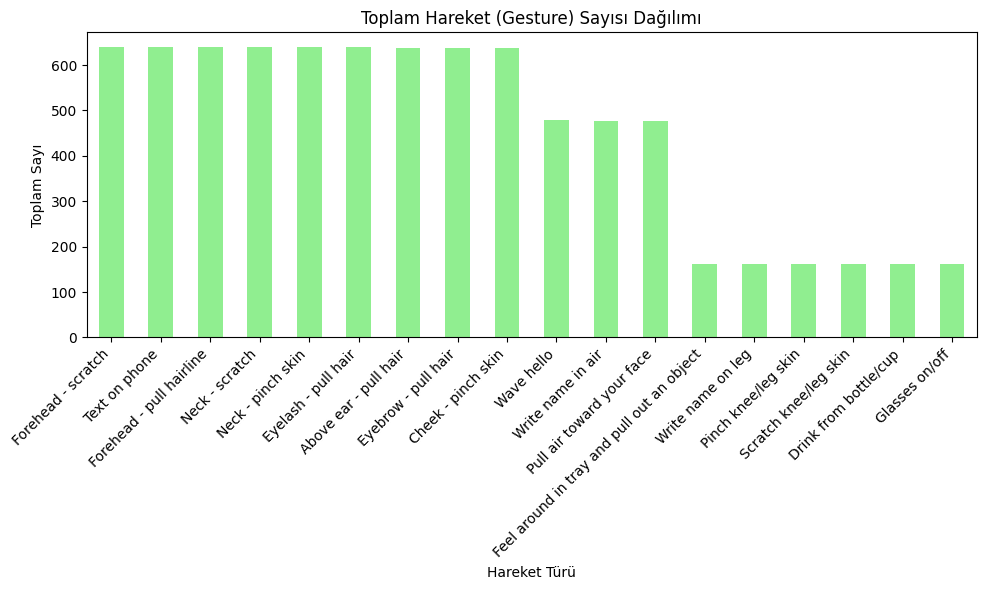

In [14]:
unique_gesture_per_sequence = train.groupby('sequence_id')['gesture'].first()

# Her bir gesture'ın kaç kez (kaç farklı sequence_id içinde) geçtiğini sayın
gesture_total_counts = unique_gesture_per_sequence.value_counts()

print("Her bir Hareketin (Gesture) Toplam Tekrar Sayısı:")
print(gesture_total_counts)

# İsteğe bağlı olarak görselleştirme:
plt.figure(figsize=(10, 6))
gesture_total_counts.plot(kind='bar', color='lightgreen')
plt.title('Toplam Hareket (Gesture) Sayısı Dağılımı')
plt.xlabel('Hareket Türü')
plt.ylabel('Toplam Sayı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
# Her subject'in yaptığı gesture setini çıkar
subject_gesture_sets = train.groupby('subject')['gesture'].unique()

# Her bir subject için 18 gesture'ın hepsini yapıp yapmadığını kontrol et
complete_gesture_subjects = subject_gesture_sets.apply(lambda gestures: len(set(gestures)) == 18)

# Sonuçları yazdır
print("Tüm gesture'ları yapan subject sayısı:", complete_gesture_subjects.sum())
print("\nTüm gesture'ları yapmayan subject'ler:")
print(complete_gesture_subjects[~complete_gesture_subjects].index.tolist())

Tüm gesture'ları yapan subject sayısı: 81

Tüm gesture'ları yapmayan subject'ler:
[]


### ÇIKARIM - Subjectler hareketleri farklı sayılarda tekrar ediyor.

In [16]:
# TEKRAR SAYISI
# Öncelikle her sequence için subject ve gesture eşleşmelerini al
sequence_info = train.groupby('sequence_id')[['subject', 'gesture']].first()

# Ardından subject-gesture kombinasyonlarını say
subject_gesture_counts = sequence_info.groupby(['subject', 'gesture']).size().unstack(fill_value=0)

# Sonuçları yazdır
print("Her subject'in gesture tekrar sayısı (sequence bazlı):")
subject_gesture_counts


Her subject'in gesture tekrar sayısı (sequence bazlı):


gesture,Above ear - pull hair,Cheek - pinch skin,Drink from bottle/cup,Eyebrow - pull hair,Eyelash - pull hair,Feel around in tray and pull out an object,Forehead - pull hairline,Forehead - scratch,Glasses on/off,Neck - pinch skin,Neck - scratch,Pinch knee/leg skin,Pull air toward your face,Scratch knee/leg skin,Text on phone,Wave hello,Write name in air,Write name on leg
subject,,,,,,,,,,,,,,,,,,
SUBJ_000206,8,8,2,8,8,2,8,8,2,8,8,2,6,2,8,6,6,2
SUBJ_001430,8,8,2,8,8,2,8,8,2,8,8,2,6,2,8,6,6,2
SUBJ_002923,8,8,2,8,8,2,8,8,2,8,8,2,6,2,8,6,6,2
SUBJ_003328,8,8,2,8,8,2,8,8,2,8,8,2,6,2,8,6,6,2
SUBJ_004117,8,8,2,8,8,2,8,8,2,8,8,2,6,2,8,6,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUBJ_063319,8,8,2,8,8,2,8,8,2,8,8,2,6,2,8,6,6,2
SUBJ_063346,8,8,2,8,8,2,8,8,2,8,8,2,6,2,8,6,6,2
SUBJ_063447,8,8,2,8,8,2,8,8,2,8,8,2,6,2,8,6,6,2



Gesture başına subject ortalama tekrar sayısı:
gesture
Above ear - pull hair                         7.876543
Cheek - pinch skin                            7.864198
Drink from bottle/cup                         1.987654
Eyebrow - pull hair                           7.876543
Eyelash - pull hair                           7.901235
Feel around in tray and pull out an object    1.987654
Forehead - pull hairline                      7.901235
Forehead - scratch                            7.901235
Glasses on/off                                1.987654
Neck - pinch skin                             7.901235
Neck - scratch                                7.901235
Pinch knee/leg skin                           1.987654
Pull air toward your face                     5.888889
Scratch knee/leg skin                         1.987654
Text on phone                                 7.901235
Wave hello                                    5.901235
Write name in air                             5.888889
Write nam

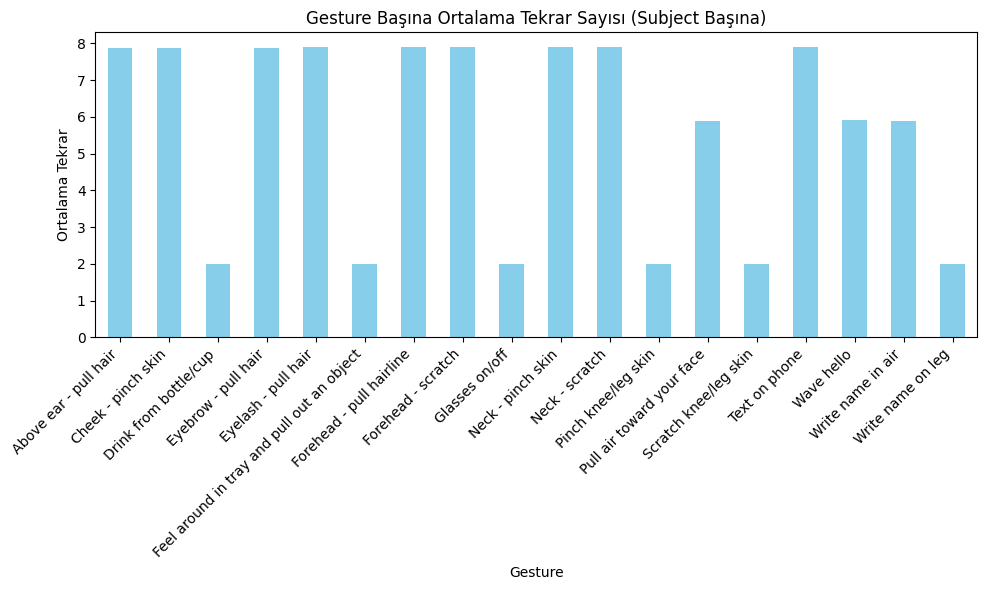

In [17]:
# HAREKETLERİN ORTALAMA TEKRAR SAYISI

mean_repeats = subject_gesture_counts.mean()
print("\nGesture başına subject ortalama tekrar sayısı:")
print(mean_repeats)

# İsteğe bağlı görselleştirme
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
mean_repeats.plot(kind='bar', color='skyblue')
plt.title('Gesture Başına Ortalama Tekrar Sayısı (Subject Başına)')
plt.xlabel('Gesture')
plt.ylabel('Ortalama Tekrar')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
acc_y_neg_subjects = (
        train.groupby('subject')['acc_y']
        .mean()
        .loc[lambda x: x < 0]
        .index
        .tolist()
    )

print("acc_y ortalaması negatif olan subject'ler:", acc_y_neg_subjects)

acc_y ortalaması negatif olan subject'ler: ['SUBJ_019262', 'SUBJ_045235']


In [19]:
acc_x_neg_subjects = (
        train.groupby('subject')['acc_x']
        .mean()
        .loc[lambda x: x < 0]
        .index
        .tolist()
    )

print("acc_x ortalaması negatif olan subject'ler:", acc_x_neg_subjects)

acc_x ortalaması negatif olan subject'ler: ['SUBJ_002923', 'SUBJ_013623', 'SUBJ_019262', 'SUBJ_019756', 'SUBJ_028998', 'SUBJ_032233', 'SUBJ_032585', 'SUBJ_039234', 'SUBJ_041243', 'SUBJ_045235', 'SUBJ_055211', 'SUBJ_061552']
